In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
sample_image_path = '/content/gdrive/MyDrive/Machine Vision/tiger.jpg';

**Importing OpenCV & Reading an Image**

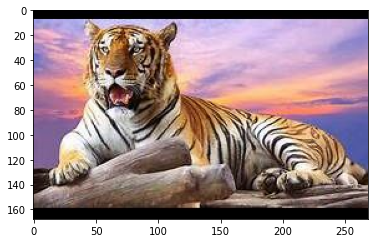

In [4]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#reading the image 

image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#plotting the image
plt.imshow(image)

By default, the imread function reads images in the BGR (Blue-Green-Red) format. We can read images in different formats using extra flags in the imread function:

* cv2.IMREAD_COLOR: Default flag for loading a color image
* cv2.IMREAD_GRAYSCALE: Loads images in grayscale format
* cv2.IMREAD_UNCHANGED: Loads images in their given format, including the alpha channel. Alpha channel stores the transparency information – the higher the value of alpha channel, the more opaque is the pixel

**Changing Color Spaces**

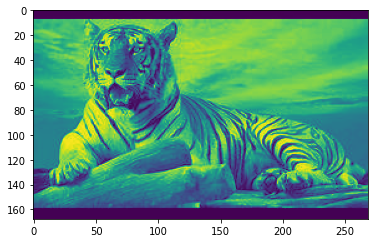

In [5]:
#converting image to Gray scale 
gray_image = cv2.cvtColor(cv2.imread(sample_image_path),cv2.COLOR_BGR2GRAY)
#plotting the grayscale image
plt.imshow(gray_image) 

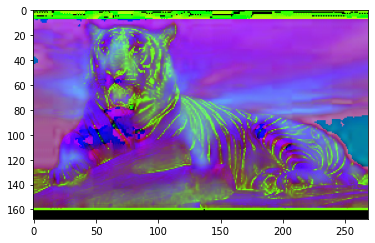

In [6]:
#converting image to HSV format
hsv_image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
#plotting the HSV image
plt.imshow(hsv_image)

We know that grayscale images have single pixel values and color images contain 3 values for each pixel – the intensities of the Red, Green and Blue channels.

Most computer vision use cases process images in RGB format. However, applications like video compression and device independent storage – these are heavily dependent on other color spaces, like the Hue-Saturation-Value or HSV color space.

OpenCV reads a given image in the BGR format by default. So, you’ll need to change the color space of your image from BGR to RGB when reading images using OpenCV.

**Resizing Images**

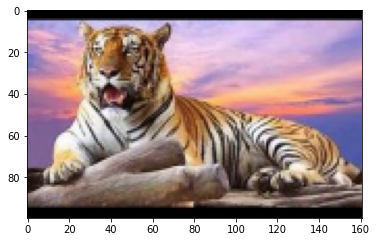

In [7]:
#downscale
scale = 60  # percent of original size  
width = int(image.shape[1] * scale / 100)  
height = int(image.shape[0] * scale / 100)  
dim = (width, height)  
smaller_image = cv2.resize(image,dim,interpolation=cv2.INTER_AREA) 
#plot the resized image
plt.imshow(smaller_image)

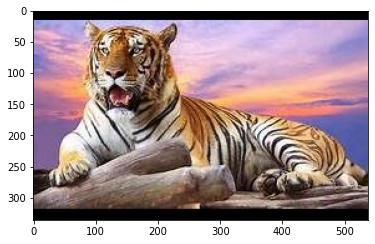

In [8]:
#upscale
scale = 200  # percent of original size  
width = int(image.shape[1] * scale / 100)  
height = int(image.shape[0] * scale / 100)  
dim = (width, height)  
larger_image = cv2.resize(image,dim,interpolation=cv2.INTER_AREA) 
#plot the resized image
plt.imshow(larger_image)

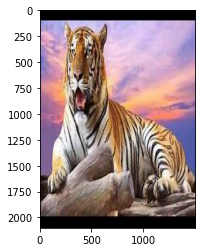

In [9]:
#resize
width = 1500
height = 2100
dim = (width, height)  
larger_image = cv2.resize(image,dim,interpolation=cv2.INTER_AREA) 
#plot the resized image
plt.imshow(larger_image)

Different Interpolation parameters:
1. INTER_NEAREST: Nearest neighbor interpolation
2. INTER_LINEAR: Bilinear interpolation
3. INTER_AREA: Resampling using pixel area relation
4. INTER_CUBIC: Bicubic interpolation over 4×4 pixel neighborhood
5. INTER_LANCZOS4: Lanczos interpolation over 8×8 neighborhood



**Image Rotation**

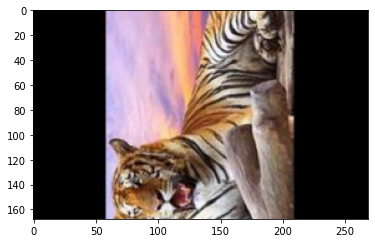

In [10]:
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

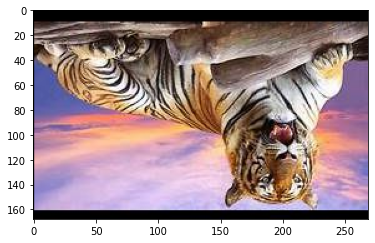

In [11]:
rows,cols = image.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 
M = cv2.getRotationMatrix2D((cols/2,rows/2),180,1) 
dst = cv2.warpAffine(image,M,(cols,rows)) 
plt.imshow(dst)

**Drawing Functions**

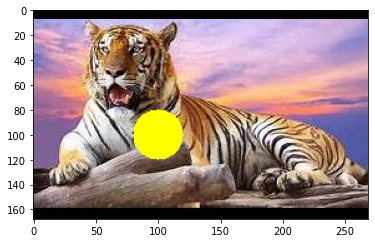

In [12]:
#circle
circle=cv2.circle(cv2.cvtColor(cv2.imread(sample_image_path),cv2.COLOR_BGR2RGB),(100,100), 20, (255,255,0), -1)  
plt.imshow(circle)  

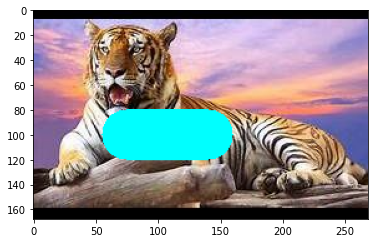

In [13]:
#rectangle
rectangle=cv2.rectangle(cv2.cvtColor(cv2.imread(sample_image_path),cv2.COLOR_BGR2RGB),(75,100),(140,100),(0,255,255),40)  
plt.imshow(rectangle) 

**Simple Image Thresholding**

Thresholding is a technique in OpenCV, which is the assignment of pixel values in relation to the threshold value provided. In thresholding, each pixel value is compared with the threshold value. If the pixel value is smaller than the threshold, it is set to 0, otherwise, it is set to a maximum value (generally 255). 

Thresholding is a very popular segmentation technique, used for separating an object considered as a foreground from its background. A threshold is a value which has two regions on its either side i.e. below the threshold or above the threshold.

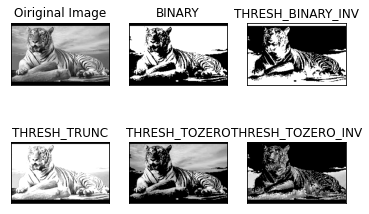

In [14]:
#importing the required libraries 
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 

#here 0 means that the image is loaded in gray scale format
gray_image = cv2.imread(sample_image_path,0)

ret,thresh_binary = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
ret,thresh_binary_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)
ret,thresh_trunc = cv2.threshold(gray_image,127,255,cv2.THRESH_TRUNC)
ret,thresh_tozero = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO)
ret,thresh_tozero_inv = cv2.threshold(gray_image,127,255,cv2.THRESH_TOZERO_INV)

#DISPLAYING THE DIFFERENT THRESHOLDING STYLES
names = ['Oiriginal Image','BINARY','THRESH_BINARY_INV','THRESH_TRUNC','THRESH_TOZERO','THRESH_TOZERO_INV']
images = gray_image,thresh_binary,thresh_binary_inv,thresh_trunc,thresh_tozero,thresh_tozero_inv

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

**Adaptive Thresholding**




In case of adaptive thresholding, different threshold values are used for different parts of the image. This function gives better results for images with varying lighting conditions – hence the term “adaptive”.

Otsu’s binarization method finds an optimal threshold value for the whole image. It works well for bimodal images (images with 2 peaks in their histogram).

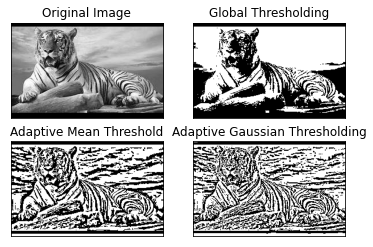

In [15]:
#import the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

#ADAPTIVE THRESHOLDING
gray_image = cv2.imread(sample_image_path,0)

ret,thresh_global = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY)
#here 11 is the pixel neighbourhood that is used to calculate the threshold value
thresh_mean = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

thresh_gaussian = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

names = ['Original Image','Global Thresholding','Adaptive Mean Threshold','Adaptive Gaussian Thresholding']
images = [gray_image,thresh_global,thresh_mean,thresh_gaussian]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

**Edge Detection**

Edges are the points in an image where the image brightness changes sharply or has discontinuities. Such discontinuities generally correspond to:

* Discontinuities in depth
* Discontinuities in surface orientation
* Changes in material properties
* Variations in scene illumination

Edges are very useful features of an image that can be used for different applications like classification of objects in the image and localization. Even deep learning models calculate edge features to extract information about the objects present in image.

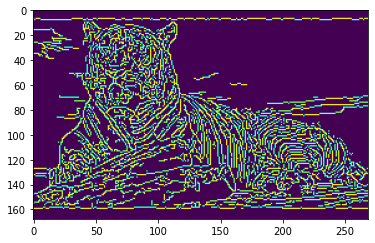

In [16]:
#import the required libraries
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline
#read the image
image = cv2.imread(sample_image_path) 
#calculate the edges using Canny edge algorithm
edges = cv2.Canny(image,100,200) 
#plot the edges
plt.imshow(edges)

**Blur the image**

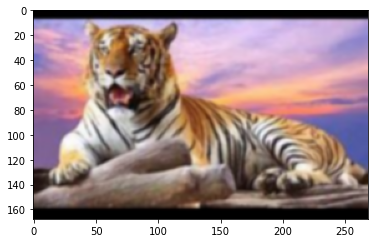

In [17]:
image  = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Gaussian Blur
gusseian = cv2.GaussianBlur(image, (5,5), 0)
plt.imshow(gusseian)


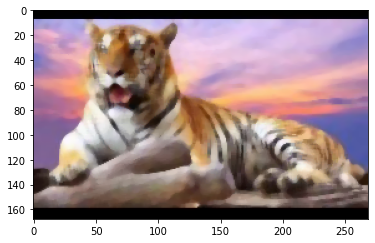

In [18]:
# Median Blur
median = cv2.medianBlur(image, 5)
plt.imshow(median)

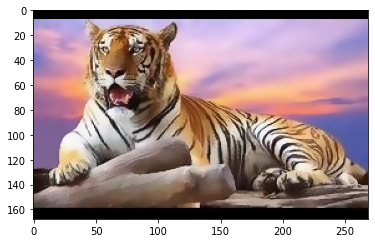

In [19]:
# Bilateral  Blur
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
plt.imshow(bilateral)

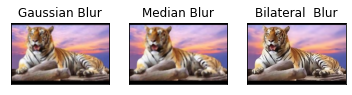

In [20]:
names = ['Gaussian Blur','Median Blur','Bilateral  Blur']
images = gusseian,median,bilateral

for i in range(3):
    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(names[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

**Eroding of image**

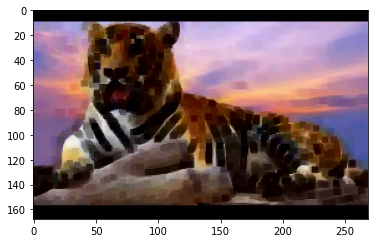

In [21]:
kernel = np.ones((5, 5), np.uint8)
image = cv2.erode(image, kernel)
plt.imshow(image)

**Arithmetic Operation on image**

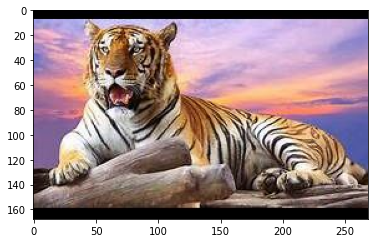

In [22]:
 # addition of two images
 image1 = cv2.imread(sample_image_path)
 image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
 image2 = cv2.imread('/content/gdrive/MyDrive/Machine Vision/space.jpg')
 image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
 weightedSum = cv2.addWeighted(image1, 0.3, image2, 0.5, 0)
 plt.imshow(image1)

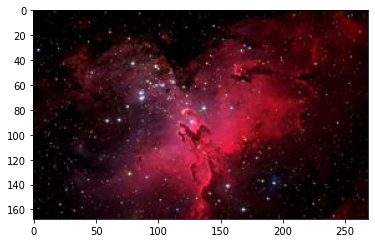

In [23]:
plt.imshow(image2)

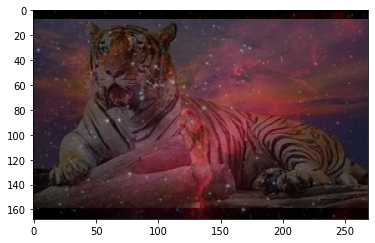

In [24]:
plt.imshow(weightedSum)

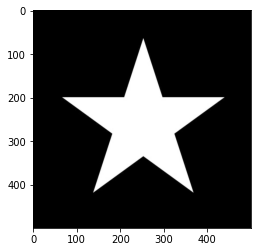

In [25]:
 image3 = cv2.imread('/content/gdrive/MyDrive/Machine Vision/star.jpg')
 image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
 image4 = cv2.imread('/content/gdrive/MyDrive/Machine Vision/circle.jpg')
 image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)
 plt.imshow(image3)

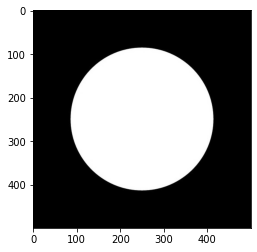

In [26]:
 plt.imshow(image4)

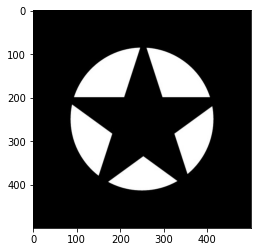

In [27]:
# Subtraction of two images
subractedImage = cv2.subtract(image4, image3)
plt.imshow(subractedImage)

**Corner Detection**




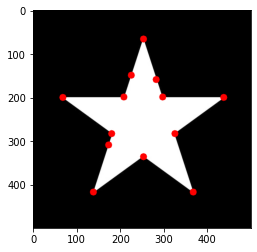

(<matplotlib.image.AxesImage at 0x7f33d9974450>, None)

In [28]:
img = cv2.imread('/content/gdrive/MyDrive/Machine Vision/star.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 8, 255, -1)
  
plt.imshow(img), plt.show()

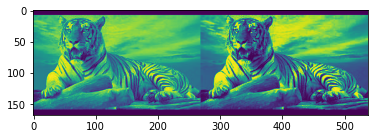

In [35]:
img = cv2.imread(sample_image_path, 0)
equ = cv2.equalizeHist(img) 
# stacking images side-by-side
res = np.hstack((img, equ))
plt.imshow(res)